In [1]:
## Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
# Add the lats and lngs into a list
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [3]:
## Calling the API and Parsing JSON Data
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through alll the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    
    # create end point url
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers an d the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count 
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
         # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced skip the city
    except:
        print("City not found, skipping...")
        pass
        
# indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | weyburn
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ust-koksa
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kropotkin
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | millerovo
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | lahij
Processing Record 14 of Set 1 | mendahara
City not found, skipping...
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | nyrob
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | ossora
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | itaituba
Processing Record 23 of 

Processing Record 41 of Set 4 | niono
Processing Record 42 of Set 4 | amderma
City not found, skipping...
Processing Record 43 of Set 4 | coahuayana
Processing Record 44 of Set 4 | araouane
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | konstantinovka
Processing Record 47 of Set 4 | tumannyy
City not found, skipping...
Processing Record 48 of Set 4 | san jose
Processing Record 49 of Set 4 | sahrak
City not found, skipping...
Processing Record 50 of Set 4 | neryungri
Processing Record 1 of Set 5 | taormina
Processing Record 2 of Set 5 | makinsk
Processing Record 3 of Set 5 | te anau
Processing Record 4 of Set 5 | santa rosa
Processing Record 5 of Set 5 | zhashkiv
Processing Record 6 of Set 5 | rio branco do sul
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | talakan
Processing Record 9 of Set 5 | sohag
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | glendive
Processing Record 12 of Set 5 | albion
Processing Reco

Processing Record 30 of Set 8 | poli
Processing Record 31 of Set 8 | soto la marina
Processing Record 32 of Set 8 | cabo san lucas
Processing Record 33 of Set 8 | ketchikan
Processing Record 34 of Set 8 | goundam
Processing Record 35 of Set 8 | gat
Processing Record 36 of Set 8 | nuuk
Processing Record 37 of Set 8 | horta
Processing Record 38 of Set 8 | cabedelo
Processing Record 39 of Set 8 | tsihombe
City not found, skipping...
Processing Record 40 of Set 8 | galveston
Processing Record 41 of Set 8 | lebedinyy
Processing Record 42 of Set 8 | tres picos
Processing Record 43 of Set 8 | yefira
City not found, skipping...
Processing Record 44 of Set 8 | pandan niog
Processing Record 45 of Set 8 | tiznit
Processing Record 46 of Set 8 | verkhnyaya balkariya
Processing Record 47 of Set 8 | san cristobal
Processing Record 48 of Set 8 | mahina
Processing Record 49 of Set 8 | nikki
Processing Record 50 of Set 8 | ndola
Processing Record 1 of Set 9 | carnarvon
Processing Record 2 of Set 9 | bol

Processing Record 19 of Set 12 | malangali
Processing Record 20 of Set 12 | camacupa
Processing Record 21 of Set 12 | bow island
Processing Record 22 of Set 12 | cabul-an
Processing Record 23 of Set 12 | pueblo nuevo
Processing Record 24 of Set 12 | takoradi
Processing Record 25 of Set 12 | chapleau
Processing Record 26 of Set 12 | christchurch
Processing Record 27 of Set 12 | guariba
Processing Record 28 of Set 12 | gazojak
Processing Record 29 of Set 12 | vestmanna
Processing Record 30 of Set 12 | mentok
City not found, skipping...
Processing Record 31 of Set 12 | lakes entrance
Processing Record 32 of Set 12 | banda aceh
Processing Record 33 of Set 12 | palmer
Processing Record 34 of Set 12 | praia
Processing Record 35 of Set 12 | nador
Processing Record 36 of Set 12 | qandala
Processing Record 37 of Set 12 | inuvik
Processing Record 38 of Set 12 | stawell
Processing Record 39 of Set 12 | strezhevoy
Processing Record 40 of Set 12 | alice springs
Processing Record 41 of Set 12 | cauc

In [4]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Reorder the columns to make it easier to read
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into csv
city_data_df.to_csv(output_data_file,index_label="City_ID")

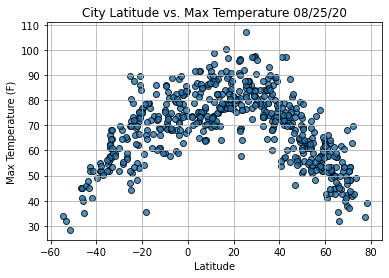

In [6]:
## Visualizations
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            ec="k", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

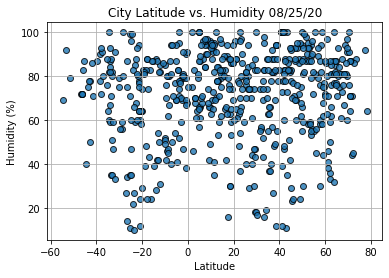

In [7]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

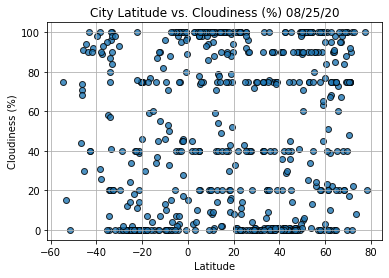

In [8]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

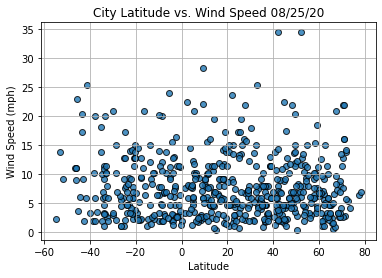

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")